# Image Search Engine
## Provides search functionalty using images and text
### Training Data is available at http://vision.cs.uiuc.edu/pascal-sentences/

In [1]:
from PIL import Image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras_preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from utils import *
from image_search_engine import image_search_engine
import numpy as np
import inspect
import os
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

Using TensorFlow backend.


In [2]:
# Intialize matplotlib parameters

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [3]:
glove_model_path = "/Volumes/My Passport for Mac/model/glove.6B"
data_path = "/Volumes/My Passport for Mac/data/imagesearch/"
features_path = "/Volumes/My Passport for Mac/model/imagesearch/features"
file_mapping_path = "/Volumes/My Passport for Mac/model/imagesearch/filemapping"
custom_features_path = "/Volumes/My Passport for Mac/model/imagesearch/customfeatures"
custom_features_file_mapping_path = "/Volumes/My Passport for Mac/model/imagesearch/customfilemapping"

In [4]:
model = image_search_engine.load_headless_pretrained_model()


Loading headless pretrained model...


In [5]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [6]:
images, vectors, image_paths, word_vectors = load_images_vectors_paths(glove_model_path, data_path)

Found 400000 word vectors.
subf: 2008_000716.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_000716.jpg
<class 'PIL.Image.Image'>
subf: 2008_001227.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_001227.jpg
<class 'PIL.Image.Image'>
subf: 2008_001380.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_001380.jpg
<class 'PIL.Image.Image'>
subf: 2008_001448.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_001448.jpg
<class 'PIL.Image.Image'>
subf: 2008_001468.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_001468.jpg
<class 'PIL.Image.Image'>
subf: 2008_001801.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_001801.jpg
<class 'PIL.Image.Image'>
subf: 2008_001971.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_001971.jpg
<class 'PIL.Image.Image'>
subf: 2008_001985.jpg
full path : /Volumes/My Pas

<class 'PIL.Image.Image'>
subf: 2008_008725.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bicycle/2008_008725.jpg
<class 'PIL.Image.Image'>
subf: 2008_008753.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bicycle/2008_008753.jpg
<class 'PIL.Image.Image'>
subf: 2008_008755.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bicycle/2008_008755.jpg
<class 'PIL.Image.Image'>
subf: 2008_000095.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bird/2008_000095.jpg
<class 'PIL.Image.Image'>
subf: 2008_001020.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bird/2008_001020.jpg
<class 'PIL.Image.Image'>
subf: 2008_001673.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bird/2008_001673.jpg
<class 'PIL.Image.Image'>
subf: 2008_001829.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bird/2008_001829.jpg
<class 'PIL.Image.Image'>
subf: 2008_002399.jpg
full path : /Volumes/My Passport for Mac/data/imagesea

<class 'PIL.Image.Image'>
subf: 2008_005536.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/2008_005536.jpg
<class 'PIL.Image.Image'>
subf: 2008_005593.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/2008_005593.jpg
<class 'PIL.Image.Image'>
subf: 2008_005664.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/2008_005664.jpg
<class 'PIL.Image.Image'>
subf: 2008_005683.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/2008_005683.jpg
<class 'PIL.Image.Image'>
subf: 2008_005695.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/2008_005695.jpg
<class 'PIL.Image.Image'>
subf: 2008_005720.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/2008_005720.jpg
<class 'PIL.Image.Image'>
subf: 2008_005863.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/2008_005863.jpg
<class 'PIL.Image.Image'>
subf: 2008_005923.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/boat/

<class 'PIL.Image.Image'>
subf: 2008_001820.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_001820.jpg
<class 'PIL.Image.Image'>
subf: 2008_001842.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_001842.jpg
<class 'PIL.Image.Image'>
subf: 2008_002179.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_002179.jpg
<class 'PIL.Image.Image'>
subf: 2008_002412.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_002412.jpg
<class 'PIL.Image.Image'>
subf: 2008_002451.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_002451.jpg
<class 'PIL.Image.Image'>
subf: 2008_003060.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_003060.jpg
<class 'PIL.Image.Image'>
subf: 2008_003067.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_003067.jpg
<class 'PIL.Image.Image'>
subf: 2008_003321.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/bus/2008_003

subf: 2008_000116.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_000116.jpg
<class 'PIL.Image.Image'>
subf: 2008_000182.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_000182.jpg
<class 'PIL.Image.Image'>
subf: 2008_000227.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_000227.jpg
<class 'PIL.Image.Image'>
subf: 2008_000345.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_000345.jpg
<class 'PIL.Image.Image'>
subf: 2008_000670.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_000670.jpg
<class 'PIL.Image.Image'>
subf: 2008_001290.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_001290.jpg
<class 'PIL.Image.Image'>
subf: 2008_001335.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_001335.jpg
<class 'PIL.Image.Image'>
subf: 2008_001592.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/cat/2008_001592.jpg
<class 'PIL.Image.

subf: 2008_007166.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007166.jpg
<class 'PIL.Image.Image'>
subf: 2008_007361.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007361.jpg
<class 'PIL.Image.Image'>
subf: 2008_007378.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007378.jpg
<class 'PIL.Image.Image'>
subf: 2008_007415.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007415.jpg
<class 'PIL.Image.Image'>
subf: 2008_007691.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007691.jpg
<class 'PIL.Image.Image'>
subf: 2008_007742.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007742.jpg
<class 'PIL.Image.Image'>
subf: 2008_007922.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007922.jpg
<class 'PIL.Image.Image'>
subf: 2008_007941.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/chair/2008_007941.jpg
<c

<class 'PIL.Image.Image'>
subf: 2008_001155.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dining_table/2008_001155.jpg
<class 'PIL.Image.Image'>
subf: 2008_001230.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dining_table/2008_001230.jpg
<class 'PIL.Image.Image'>
subf: 2008_001451.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dining_table/2008_001451.jpg
<class 'PIL.Image.Image'>
subf: 2008_001723.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dining_table/2008_001723.jpg
<class 'PIL.Image.Image'>
subf: 2008_001758.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dining_table/2008_001758.jpg
<class 'PIL.Image.Image'>
subf: 2008_001809.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dining_table/2008_001809.jpg
<class 'PIL.Image.Image'>
subf: 2008_002079.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dining_table/2008_002079.jpg
<class 'PIL.Image.Image'>
subf: 2008_002362.jpg
full pa

<class 'PIL.Image.Image'>
subf: 2008_007537.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dog/2008_007537.jpg
<class 'PIL.Image.Image'>
subf: 2008_007567.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dog/2008_007567.jpg
<class 'PIL.Image.Image'>
subf: 2008_007694.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dog/2008_007694.jpg
<class 'PIL.Image.Image'>
subf: 2008_007871.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/dog/2008_007871.jpg
<class 'PIL.Image.Image'>
subf: 2008_000219.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/horse/2008_000219.jpg
<class 'PIL.Image.Image'>
subf: 2008_000912.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/horse/2008_000912.jpg
<class 'PIL.Image.Image'>
subf: 2008_001031.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/horse/2008_001031.jpg
<class 'PIL.Image.Image'>
subf: 2008_001235.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/horse/

subf: 2008_003320.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/motorbike/2008_003320.jpg
<class 'PIL.Image.Image'>
subf: 2008_003892.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/motorbike/2008_003892.jpg
<class 'PIL.Image.Image'>
subf: 2008_003939.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/motorbike/2008_003939.jpg
<class 'PIL.Image.Image'>
subf: 2008_004084.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/motorbike/2008_004084.jpg
<class 'PIL.Image.Image'>
subf: 2008_004615.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/motorbike/2008_004615.jpg
<class 'PIL.Image.Image'>
subf: 2008_005139.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/motorbike/2008_005139.jpg
<class 'PIL.Image.Image'>
subf: 2008_005213.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/motorbike/2008_005213.jpg
<class 'PIL.Image.Image'>
subf: 2008_005427.jpg
full path : /Volumes/My Passport for Mac/data/imagesea

<class 'PIL.Image.Image'>
subf: 2008_004002.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/person/2008_004002.jpg
<class 'PIL.Image.Image'>
subf: 2008_004123.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/person/2008_004123.jpg
<class 'PIL.Image.Image'>
subf: 2008_004130.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/person/2008_004130.jpg
<class 'PIL.Image.Image'>
subf: 2008_004176.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/person/2008_004176.jpg
<class 'PIL.Image.Image'>
subf: 2008_004307.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/person/2008_004307.jpg
<class 'PIL.Image.Image'>
subf: 2008_004330.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/person/2008_004330.jpg
<class 'PIL.Image.Image'>
subf: 2008_004387.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/person/2008_004387.jpg
<class 'PIL.Image.Image'>
subf: 2008_004426.jpg
full path : /Volumes/My Passport for Mac/data/ima

<class 'PIL.Image.Image'>
subf: 2008_004007.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sheep/2008_004007.jpg
<class 'PIL.Image.Image'>
subf: 2008_004292.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sheep/2008_004292.jpg
<class 'PIL.Image.Image'>
subf: 2008_004453.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sheep/2008_004453.jpg
<class 'PIL.Image.Image'>
subf: 2008_004621.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sheep/2008_004621.jpg
<class 'PIL.Image.Image'>
subf: 2008_004629.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sheep/2008_004629.jpg
<class 'PIL.Image.Image'>
subf: 2008_004854.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sheep/2008_004854.jpg
<class 'PIL.Image.Image'>
subf: 2008_005447.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sheep/2008_005447.jpg
<class 'PIL.Image.Image'>
subf: 2008_005494.jpg
full path : /Volumes/My Passport for Mac/data/imagesearc

subf: 2008_008608.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sofa/2008_008608.jpg
<class 'PIL.Image.Image'>
subf: 2008_008622.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sofa/2008_008622.jpg
<class 'PIL.Image.Image'>
subf: 2008_008628.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sofa/2008_008628.jpg
<class 'PIL.Image.Image'>
subf: 2008_008642.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sofa/2008_008642.jpg
<class 'PIL.Image.Image'>
subf: 2008_008649.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/sofa/2008_008649.jpg
<class 'PIL.Image.Image'>
subf: 2008_000343.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/train/2008_000343.jpg
<class 'PIL.Image.Image'>
subf: 2008_000916.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/train/2008_000916.jpg
<class 'PIL.Image.Image'>
subf: 2008_001164.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/train/2008_001164.jpg
<class 

<class 'PIL.Image.Image'>
subf: 2008_007282.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/tv_monitor/2008_007282.jpg
<class 'PIL.Image.Image'>
subf: 2008_007332.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/tv_monitor/2008_007332.jpg
<class 'PIL.Image.Image'>
subf: 2008_007446.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/tv_monitor/2008_007446.jpg
<class 'PIL.Image.Image'>
subf: 2008_007916.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/tv_monitor/2008_007916.jpg
<class 'PIL.Image.Image'>
subf: 2008_007987.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/tv_monitor/2008_007987.jpg
<class 'PIL.Image.Image'>
subf: 2008_008269.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/tv_monitor/2008_008269.jpg
<class 'PIL.Image.Image'>
subf: 2008_008439.jpg
full path : /Volumes/My Passport for Mac/data/imagesearch/tv_monitor/2008_008439.jpg
<class 'PIL.Image.Image'>
subf: 2008_008524.jpg
full path : /Volumes/

In [7]:
#data_path = "/Volumes/My Passport for Mac/data/temp/"
#images, vectors, image_paths = load_paired_img_wrd(data_path, word_vectors)

In [8]:
generate_image_features = True
model = image_search_engine.load_headless_pretrained_model()
if generate_image_features:
    images_features, file_index = image_search_engine.generate_features(image_paths, model)
    image_search_engine.save_features(features_path, images_features, file_mapping_path, file_index)
else:
    print("loading image features from disk")
    images_features, file_index = image_search_engine.load_features(features_path, file_mapping_path)


Loading headless pretrained model...
Generating features...
Saving features...


In [9]:
print(file_index[100])
print(images_features[100])


/Volumes/My Passport for Mac/data/imagesearch/bird/2008_000095.jpg
[0.         2.219502   0.         ... 0.         0.43670505 0.        ]


In [10]:
image_index = image_search_engine.index_features(images_features)

Indexing features...


In [11]:
#print(file_index[200])
#results = image_search_engine.search_index_by_key(200, image_index, file_index)

In [ ]:
#print(results)


In [ ]:
#displayImages(results)

In [ ]:
# Index 284 is the index for the Siamese cat class in Imagenet
#weighted_features = image_search_engine.get_weighted_features(200, images_features)
#weighted_index = image_search_engine.index_features(weighted_features)
#weighted_results = image_search_engine.search_index_by_key(200, weighted_index, file_index)

In [ ]:
#displayImages(weighted_results)

### Image Search by Feature Vector

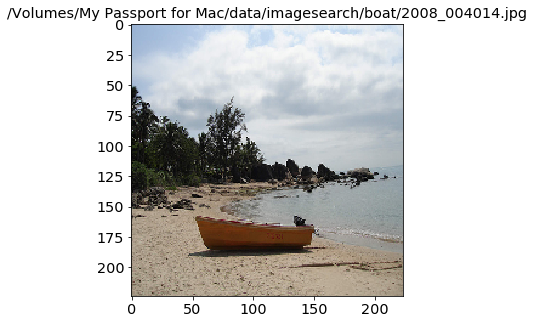

In [16]:
#image_path = "/Volumes/My Passport for Mac/data/imagesearch/aeroplane/2008_000716.jpg"
#image_path = "/Volumes/My Passport for Mac/data/imagesearch/bird/2008_000095.jpg"
image_path = "/Volumes/My Passport for Mac/data/imagesearch/boat/2008_004014.jpg"
displayImagebyPath(image_path)


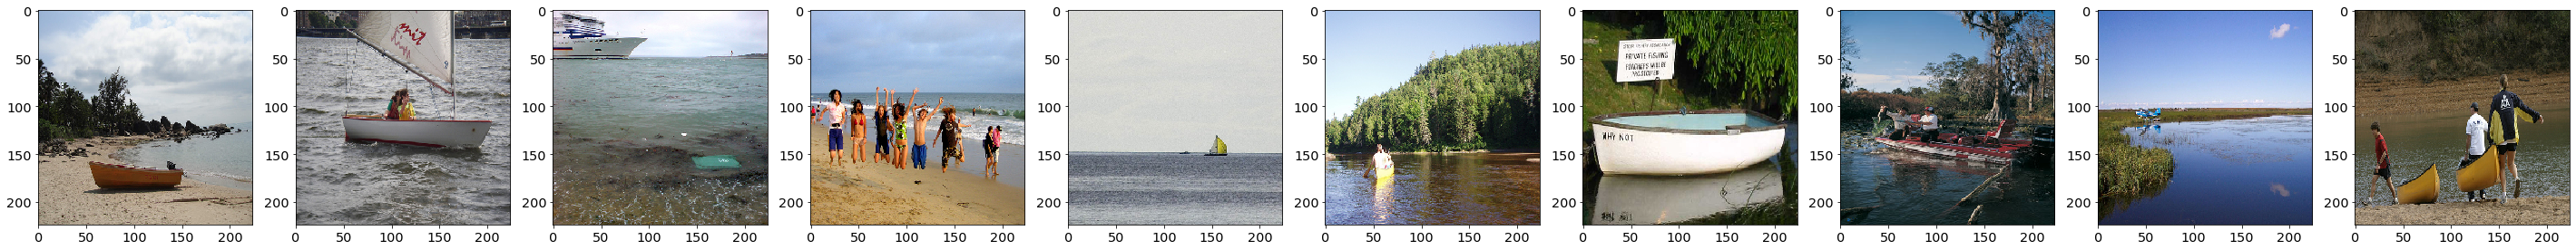

In [17]:
fv = image_search_engine.get_feature_vector(model, image_path)
results = image_search_engine.search_index_by_value(fv, image_index, file_index)
displayImages(results)

### Searching Similar words

In [18]:
print(word_vectors["bottle"])

[-0.36103    0.53612   -0.31926   -0.49466    0.22531    0.68284
 -0.154     -0.4189     0.64487   -0.64345   -0.10404   -0.46821
 -0.22309   -0.24517    0.052643   0.25325   -0.47008    0.33953
 -0.27983    0.070647   0.21413    0.23985   -0.19891    0.37673
 -0.24772   -0.6149    -0.63005    0.25413    0.0051111 -0.76437
 -0.49298   -0.15191   -0.010272   0.28237   -0.62851    0.54018
 -0.1591     0.29896   -0.083272   0.080493  -0.25582   -0.38129
  0.15281   -0.12251   -0.68126   -0.096922   0.12655    0.078668
 -0.15645    0.28225   -0.011875  -0.499     -0.32754    0.18251
 -0.29955    0.57332    0.076515   0.32552    0.65188   -0.23338
  0.0099605 -0.33375    0.30219    0.21858   -0.42436   -0.75695
 -1.0581    -0.36343    0.18339   -0.13694   -0.076691  -0.46602
 -0.046083   0.5621     0.19505   -0.64329    0.18193   -0.74809
 -0.41208    0.056588  -0.56775    0.29277    0.24487    0.4463
  0.54706   -0.25066    0.31051   -0.0016617  0.15568   -0.61664
  0.81377    0.34424    0

In [19]:
word_index, word_mapping = image_search_engine.build_word_index(word_vectors)

INFO:root:Creating mapping and list of features
INFO:root:Building tree


Building word index ...
Indexing features...


INFO:root:Tree built


In [28]:
fv = word_vectors["ocean"]
results = image_search_engine.search_index_by_value(fv, word_index, word_mapping)

In [29]:
print(results)

[[2561, 'ocean', 0.00023102748673409224], [937, 'sea', 0.7943891882896423], [2878, 'waters', 0.8256394267082214], [14398, 'oceans', 0.8440721035003662], [2353, 'atlantic', 0.8557063341140747], [1244, 'pacific', 0.9185106754302979], [954, 'coast', 0.9188300371170044], [3558, 'coastal', 0.9548884034156799], [7574, 'arctic', 0.9655448794364929], [1843, 'islands', 0.9826540946960449]]


### Build Custom Model for Text2Visual and Visual2Text Search

In [30]:
custom_model = image_search_engine.setup_custom_model()

Setting up custom model ...


In [31]:
model_save_path = "/Volumes/My Passport for Mac/model/imagesearch/model2.hdf5"
model_load_oath = "/Volumes/My Passport for Mac/model/imagesearch/model2.hdf5"

train_model = True
if train_model:
    num_epochs = 50
    batch_size = 32
    print("Training for %s epochs, this might take a while, "
            "change train_model to False to load pre-trained model" % num_epochs)
    x, y = shuffle(images, vectors, random_state=2)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
    checkpointer = ModelCheckpoint(filepath='checkpoint.hdf5', verbose=1, save_best_only=True)
    history = custom_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                         epochs=num_epochs, batch_size=batch_size, callbacks=[checkpointer])
    custom_model.save(model_save_path)
else:
    st.write("Loading model from `%s`" % model_load_path)
    custom_model = load_model(model_load_path)

Training for 50 epochs, this might take a while, change train_model to False to load pre-trained model
Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 88s 110ms/step - loss: -0.0332 - val_loss: -0.0917

Epoch 00001: val_loss improved from inf to -0.09169, saving model to checkpoint.hdf5
Epoch 2/50
800/800 [==============================] - 83s 103ms/step - loss: -0.1343 - val_loss: -0.1953

Epoch 00002: val_loss improved from -0.09169 to -0.19531, saving model to checkpoint.hdf5
Epoch 3/50
800/800 [==============================] - 88s 110ms/step - loss: -0.2177 - val_loss: -0.2691

Epoch 00003: val_loss improved from -0.19531 to -0.26908, saving model to checkpoint.hdf5
Epoch 4/50
800/800 [==============================] - 84s 105ms/step - loss: -0.2784 - val_loss: -0.3201

Epoch 00004: val_loss improved from -0.26908 to -0.32013, saving model to checkpoint.hdf5
Epoch 5/50
800/800 [==============================] - 84s 105ms/step - l

Epoch 42/50
800/800 [==============================] - 86s 107ms/step - loss: -0.6951 - val_loss: -0.6577

Epoch 00042: val_loss improved from -0.65522 to -0.65767, saving model to checkpoint.hdf5
Epoch 43/50
800/800 [==============================] - 88s 110ms/step - loss: -0.7004 - val_loss: -0.6603

Epoch 00043: val_loss improved from -0.65767 to -0.66031, saving model to checkpoint.hdf5
Epoch 44/50
800/800 [==============================] - 92s 115ms/step - loss: -0.6973 - val_loss: -0.6629

Epoch 00044: val_loss improved from -0.66031 to -0.66288, saving model to checkpoint.hdf5
Epoch 45/50
800/800 [==============================] - 94s 118ms/step - loss: -0.7062 - val_loss: -0.6653

Epoch 00045: val_loss improved from -0.66288 to -0.66534, saving model to checkpoint.hdf5
Epoch 46/50
800/800 [==============================] - 92s 116ms/step - loss: -0.7091 - val_loss: -0.6677

Epoch 00046: val_loss improved from -0.66534 to -0.66773, saving model to checkpoint.hdf5
Epoch 47/50
800

### Visualize Model Performance

In [37]:
print(history.history["val_loss"])

[-0.09168527722358703, -0.19531460523605346, -0.269075779914856, -0.3201254367828369, -0.3568123662471771, -0.387229380607605, -0.4115013515949249, -0.4315235030651092, -0.449040207862854, -0.46404950857162475, -0.47710060119628905, -0.4900059127807617, -0.5023534250259399, -0.5126963782310486, -0.5218509912490845, -0.5312571406364441, -0.540120313167572, -0.5488255643844604, -0.5560262417793274, -0.5630763101577759, -0.5702187013626099, -0.5764512681961059, -0.5820180940628051, -0.5875499629974366, -0.5925066804885865, -0.5974760055541992, -0.6027460289001465, -0.6078188467025757, -0.6126123332977295, -0.6168378806114196, -0.6213758873939514, -0.6254903650283814, -0.6293183326721191, -0.6326246166229248, -0.6358757138252258, -0.6394700479507446, -0.6427335977554322, -0.6459364318847656, -0.6492308902740479, -0.6521754503250122, -0.6552241826057434, -0.6576723098754883, -0.660311086177826, -0.6628843569755554, -0.6653394031524659, -0.6677320885658264, -0.6694883370399475, -0.6718988299

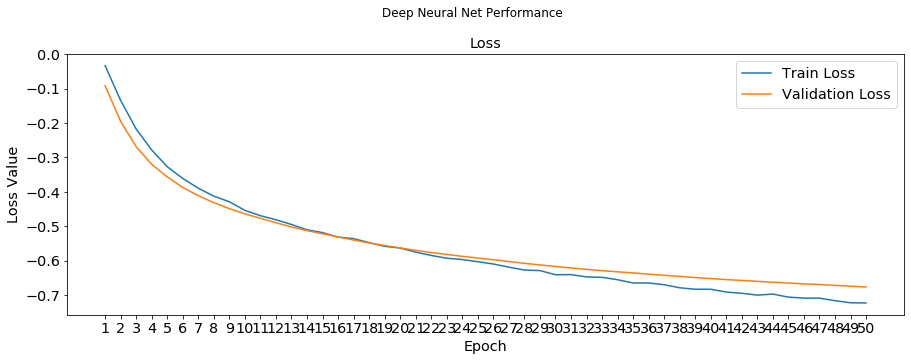

In [41]:
f, ax2 = plt.subplots(1, 1, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,51))
#ax1.plot(epochs, history.history['acc'], label='Train Accuracy')
#ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
#ax1.set_xticks(epochs)
#ax1.set_ylabel('Accuracy Value')
#ax1.set_xlabel('Epoch')
#ax1.set_title('Accuracy')
#l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [42]:
generate_custom_features = True
if generate_custom_features:
    hybrid_images_features, file_mapping = image_search_engine.generate_features(image_paths, custom_model)
    image_search_engine.save_features(custom_features_path, hybrid_images_features, custom_features_file_mapping_path,
                                file_mapping)
else:
    hybrid_images_features, file_mapping = image_search_engine.load_features(custom_features_path,
                                                                       custom_features_file_mapping_path)
image_index = image_search_engine.index_features(hybrid_images_features, dims=300)

Generating features...


INFO:root:1000 images loaded
INFO:root:Images preprocessed
INFO:root:Inference done, 89.58524799346924 Generation time
INFO:root:Weights saved


Saving features...
Indexing features...


### Image to text Search

/Volumes/My Passport for Mac/data/imagesearch/bottle/2008_000112.jpg


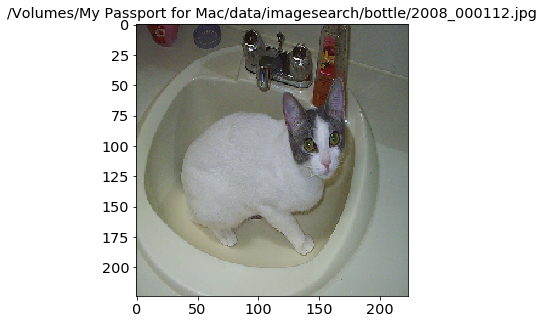

In [44]:
print(file_mapping[200])
displayImagebyPath(file_mapping[200])

In [45]:
print(file_mapping[200])

results = image_search_engine.search_index_by_value(hybrid_images_features[200], word_index, word_mapping)
print(results)

/Volumes/My Passport for Mac/data/imagesearch/bottle/2008_000112.jpg
[[6676, 'bottle', 0.776147186756134], [10217, 'champagne', 1.106755256652832], [19781, 'perfume', 1.115438461303711], [9716, 'glasses', 1.1226760149002075], [8629, 'candy', 1.1236426830291748], [9812, 'honey', 1.1366643905639648], [6242, 'chocolate', 1.1505355834960938], [15243, 'bottled', 1.1535670757293701], [9315, 'bite', 1.170526146888733], [21844, 'claw', 1.1733684539794922]]


### Text to Image Search

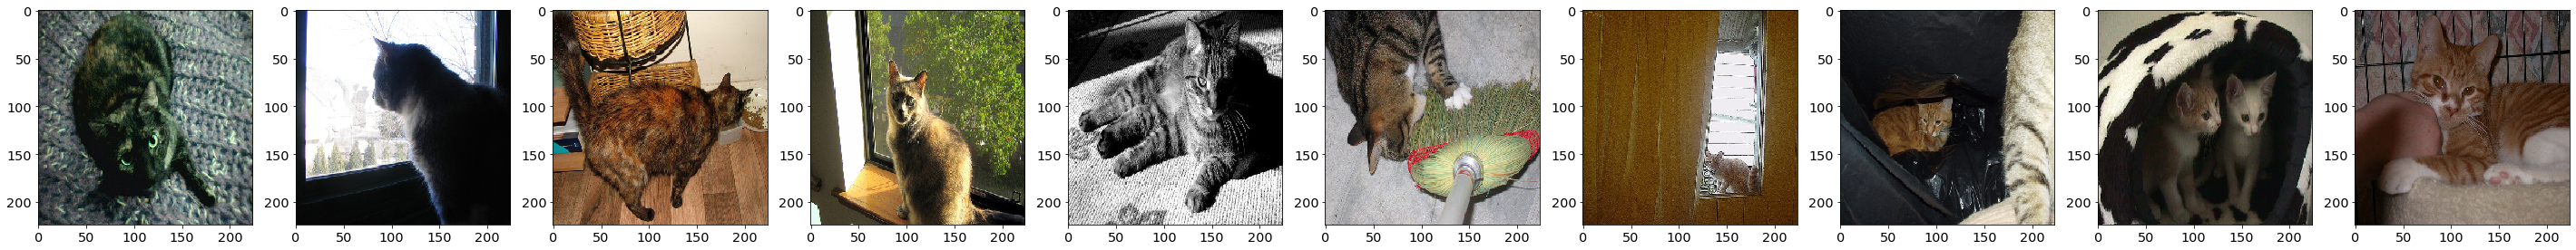

In [55]:
results = image_search_engine.search_index_by_value(word_vectors["cat"], image_index, file_mapping)
displayImages(results)

### Search for Untrained Words

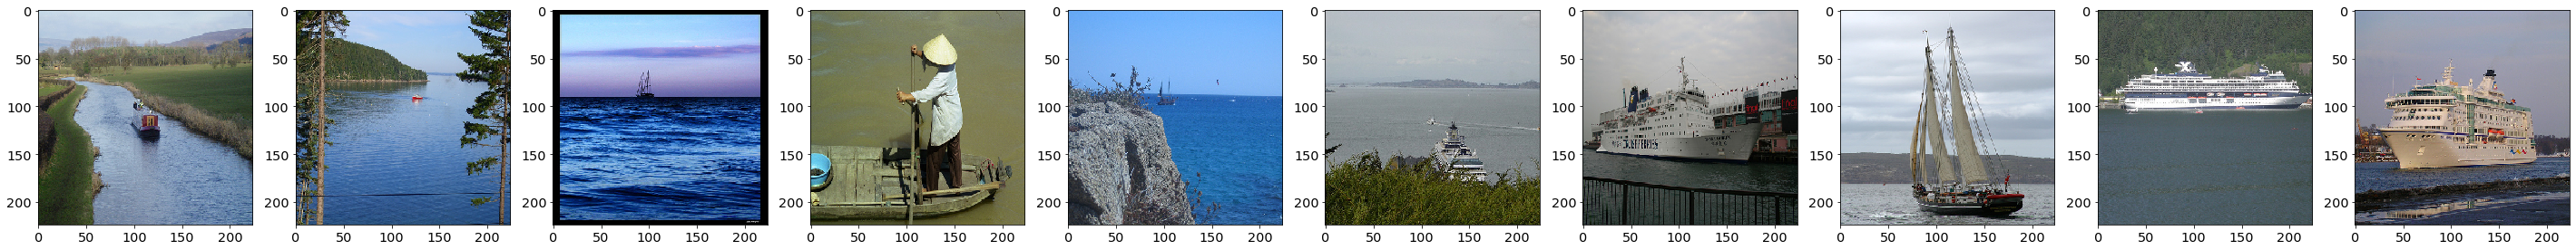

In [52]:
results = image_search_engine.search_index_by_value(word_vectors["ocean"], image_index, file_mapping)
displayImages(results)